In [17]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

import matplotlib.pyplot as plt
import numpy as np


from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 

from scipy.fftpack import fft, fftfreq
from time import time



### Serie de Fourier exponencial discreta

Sea x(n) una señal aperiódica discreta en el tiempo, la transformada discreta de Fourier (DFT) de esta señal se define como:

$$X[k]= \sum_{n=0}^{N-1} x[n]\,e^{-j 2\pi n \frac{k}{N}}$$

en la cual X(k) es un conjunto de números complejos. 

La evaluación directa de esa fórmula requiere $N^{2}$ operaciones aritméticas, pero con un algoritmo FFT se puede obtener el mismo resultado con sólo $N log N$ operaciones.


$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]\cdot e^{i 2 \pi k \frac{n}{N}}$$

In [18]:
# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.


# Transformada Discreta de Fourier     
def DFT(x):
    N = len(x)
    print(N)
    X = list()
    for k in range(N):
        X.append( sum([s*np.exp(-2j*np.pi*n*k/N) for n,s in enumerate(x)]))
    return np.array(X)  
    


# Transformada Inversa Discreta de Fourier       
def IDFT(X):
    N = len(X)
    x = list()
    for n in range(N):
        x.append( sum([S*np.exp(2j*np.pi*k*n/N) for k,S in enumerate(X)]))
    return np.array(x)/N  



    
def freq(X, fs):
    N =  len(X)
    fo = np.arange(0,N/2,1) *fs/ N
    fo = np.append(fo,np.arange(-N/2,0,1) *fs/N )
    return fo

def tim(x, fs):
    return np.arange(0,len(x),1) /fs

Text(0, 0.5, '$y(t)$')

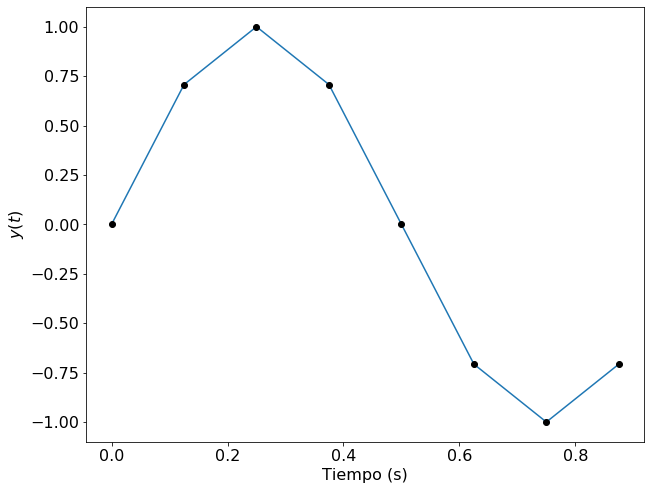

In [19]:

# Defino una señal para calcular el espectro del la serie de fourier
 
N  =  8       # Número de bines muestreados
f  = 1.0     # Hz
fs = f * 8    # Frecuencia de muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (N - 1) * dt, N)  # Intervalo de tiempo en segundos 

y = np.sin(2 * pi * f * t) # Señal

plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')

8
Elapsed time: 0.0019357204 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


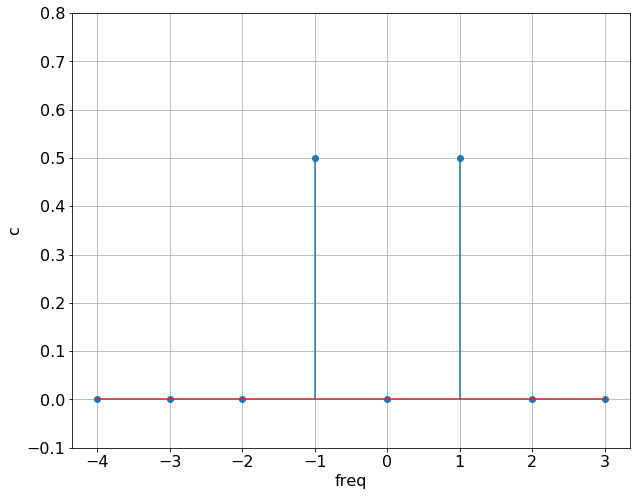

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


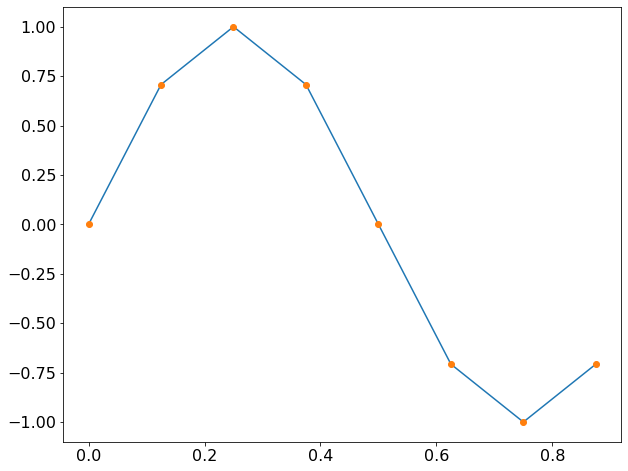

In [20]:
# Serie de Fourier Exponencial
# la separacion de las deltas = 1/T 


start_time = time()
Y    = DFT(y) 
elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)



plt.stem( freq(y,fs),  np.abs(Y)/len(Y) )
plt.ylabel('c')
plt.xlabel('freq')
plt.ylim(-0.1, 0.8)
plt.grid()
plt.show()

yo    = IDFT(Y)


plt.plot(tim(yo,fs), yo)
plt.plot(tim(yo,fs),yo,'o')

1.0+0.0j  1.0+0.0j  1.0+0.0j  1.0+0.0j  1.0+0.0j  1.0+0.0j  1.0+0.0j  1.0+0.0j  
1.0+0.0j  0.7-0.7j  0.0-1.0j  -0.7-0.7j  -1.0-0.0j  -0.7+0.7j  -0.0+1.0j  0.7+0.7j  
1.0+0.0j  0.0-1.0j  -1.0-0.0j  -0.0+1.0j  1.0+0.0j  0.0-1.0j  -1.0-0.0j  -0.0+1.0j  
1.0+0.0j  -0.7-0.7j  -0.0+1.0j  0.7-0.7j  -1.0-0.0j  0.7+0.7j  0.0-1.0j  -0.7+0.7j  
1.0+0.0j  -1.0-0.0j  1.0+0.0j  -1.0-0.0j  1.0+0.0j  -1.0-0.0j  1.0+0.0j  -1.0-0.0j  
1.0+0.0j  -0.7+0.7j  0.0-1.0j  0.7+0.7j  -1.0-0.0j  0.7-0.7j  -0.0+1.0j  -0.7-0.7j  
1.0+0.0j  -0.0+1.0j  -1.0-0.0j  0.0-1.0j  1.0+0.0j  -0.0+1.0j  -1.0-0.0j  -0.0-1.0j  
1.0+0.0j  0.7+0.7j  -0.0+1.0j  -0.7+0.7j  -1.0-0.0j  -0.7-0.7j  -0.0-1.0j  0.7-0.7j
0.0  4.0  0.0  0.0  0.0  0.0  0.0  4.0


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

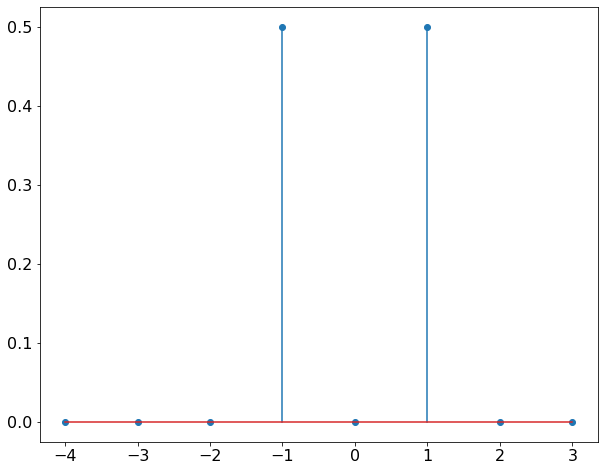

In [21]:
#https://en.wikipedia.org/wiki/DFT_matrix
m = list()

for k in range(N):
    m.append( [np.exp(-2j*np.pi*n*k/N) for n in range(N)])

m = np.array(m)    
    
print('  \n'.join(['  '.join(['{:1.1f}'.format(item) for item in row]) 
      for row in m])) 


Ym = m.dot(y) 

print('  \n'.join(['  '.join(['{:1.1f}'.format(item) for item in abs(Ym)])]))

plt.stem(freq(y,fs), abs(Ym)/len(Ym))

Elapsed time: 0.0001790524 seconds.


/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


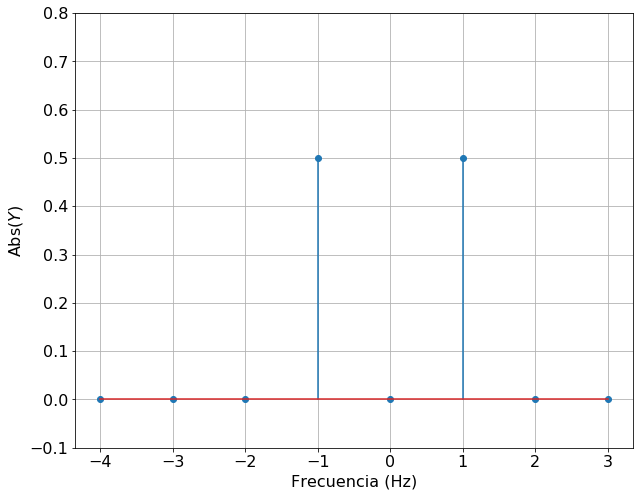

In [22]:
start_time = time()
Y = fft(y) / N  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq = fftfreq(N, dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.ylim(-0.1, 0.8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()



In [23]:
# frecuancia de la señal
fm   = 10 #Hz
# Amplitud
Ac   = 2  

# senal pulso coseno de frecuencia 10 Hz, muestrea a 100 Sps (muestras por segundo). 
# En este caso N es 100
# defino el muestreo
fs = 2000 #Sps
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 
# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

# Pulso clase B (coseno)
Sm   = [Ac*np.cos(2*np.pi*fm*t)+2 for t in time] 
# Señal Pulso de coseno
Sm   = [s if s > 1 else 1  for s in Sm] 

## Metodo de los trapecios 

El metodo de los trapecios permite calcular las componentes de Fourier de forma aproximada empleando un muestreo discreto.

Este metodo emplea trapecios para estimar el area de calculada por la integral en las componentes de Fourier. 


$f(t) = {a_0} + \sum_{n=1}^\infty\left(a_n\cos\left( \frac{2\pi}{T}\cdot  n \cdot t \right) + b_n\sin \left( \frac{2\pi}{T} \cdot  n \cdot t \right) \right)$


siendo:

$ a_0 = \frac{1}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1} f(T_s \cdot i) \cdot T_s $

$ a_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

$ b_n = \frac{2}{T} \sum_{i=\frac{-N}{2}}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \sin{(\frac{2\cdot \pi }{T} \cdot n \cdot T_s \cdot i )} \cdot T_s $ 

donde:
$ T   $ es el periodo de la señal, $ T_s $ es el periodo del muestreo y $ N = \frac{T}{T_s} $

Si $N = 24$  resulta entonces (valido para una función par):

$ a_0 = \frac{1}{12} \sum_{i=0}^{\frac{N}{2}-1} f(T_s \cdot i) =  \frac{1}{12} ( \frac{A+B}{2} + \frac{B+C}{2} + \frac{C+D}{2}+ \frac{D+E}{2}+ \frac{E+F}{2}+ \frac{F+G}{2}+ \frac{G+H}{2} + \frac{H+I}{2}+ \frac{I+J}{2}+ \frac{J+K}{2} )   $

$ a_0 = \frac{1}{12} ( \frac{A}{2} + B + C + D +E+ F  + G + H + I + J + \frac{K}{2})   $


$ a_n = \frac{1}{6} \sum_{i=0}^{\frac{N}{2}-1}  f(T_s \cdot i) \cdot \cos{(\frac{2\cdot \pi }{24} \cdot i \cdot n )} $ 

$ a_n =  \frac{1}{6} ( \frac{A}{2}  + B \cos{\frac{\pi }{12}}+ C \cos{\frac{2\cdot \pi }{12}}+ D\cos{\frac{3\cdot \pi }{12}}+ E\cos{\frac{4\cdot \pi }{12}} + F \cos{\frac{ \cdot \pi  }{12}}+ G \cos{ \frac{ \cdot \pi }{12}}+ H \cos{\frac{7 \cdot \pi }{12}}+ I \cos{\frac{8\cdot \pi }{12}}+ J \cos{\frac{9\cdot \pi }{12}}+ \frac{K}{2}\cos{\frac{10\cdot \pi }{12}} )  $


$ b_n = 0 $ 



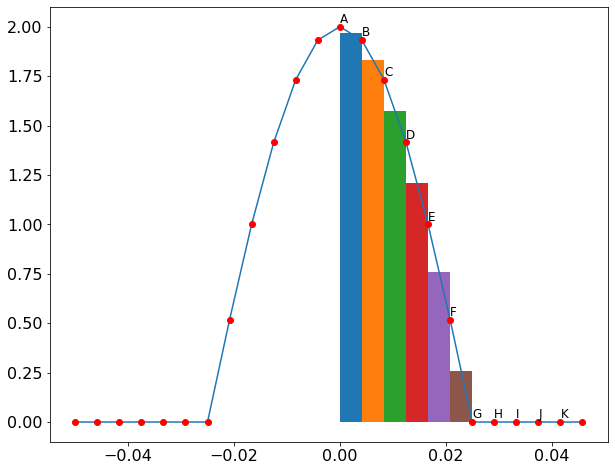

In [24]:
# senal pulso coseno de frecuencia 100 Hz, muestrea a 100e3 Sps (muestras por segundo). 
# En este caso N es 24 
# defino el sampleo
fs = fm*24 #Sps 

# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

# Señal coseno
Sm   = [Ac*np.cos(2*np.pi*fm*t) for t in time] 
# Señal Pulso de coseno
Sm   = [s if s > 0 else 0  for s in Sm] 

# Defino el vector 
myPoint  = [ 'A','B','C','D','E','F','G','H','I','J','K']

plt.plot(time, Sm)
plt.plot(time, Sm, 'ro')
for i, mp in enumerate(myPoint):
    plt.text(time[i+12], Sm[i+12] +0.02, mp, fontsize=12)
    plt.fill_between(time[i+12:i+14], 0, (Sm[i+12] + Sm[i+13] )/2 )
#plt.ylim([-0.2,1.2])
plt.show()

        


In [25]:
# Valores de las componentes
print(['{}={:.2f}'.format(mp,s) for mp,s in zip(myPoint,Sm[12:])])


['A=2.00', 'B=1.93', 'C=1.73', 'D=1.41', 'E=1.00', 'F=0.52', 'G=0.00', 'H=0.00', 'I=0.00', 'J=0.00', 'K=0.00']


In [26]:
phase = np.arange(-np.pi, np.pi, 2*np.pi/24)
# Calculo de ao, a1, a2, a3.
print('ao= 1/12*({:.2f}'.format(Sm[12]/2),''.join('{:+.2f}'.format(s) for s in (Sm[13:])),')',sep='')
print('ao= {:.2f}'.format( (Sm[12]/2+ sum(Sm[13:]))/12),sep='') 
print('')
for i in [1,2,3,4,5]:
    print('a{:1}= 1/6*({:.2f}'.format(i,Sm[12]/2),''.join('{:+.2f}'.format( (s*np.cos(p))) for p,s in zip(phase[13:]*i,Sm[13:])),')',sep='')
    a = (Sm[12]/2+ sum([(s*np.cos(p)) for p,s in zip(phase[13:]*i,Sm[13:])]  ) )/6
    print('a{:1}= {:.2f}'.format(i,a),sep='') 
    print('')

ao= 1/12*(1.00+1.93+1.73+1.41+1.00+0.52+0.00+0.00+0.00+0.00+0.00+0.00)
ao= 0.63

a1= 1/6*(1.00+1.87+1.50+1.00+0.50+0.13-0.00-0.00-0.00-0.00-0.00-0.00)
a1= 1.00

a2= 1/6*(1.00+1.67+0.87-0.00-0.50-0.45-0.00-0.00-0.00+0.00+0.00+0.00)
a2= 0.43

a3= 1/6*(1.00+1.37-0.00-1.00-1.00-0.37+0.00+0.00+0.00+0.00-0.00-0.00)
a3= -0.00

a4= 1/6*(1.00+0.97-0.87-1.41-0.50+0.26+0.00+0.00-0.00-0.00-0.00+0.00)
a4= -0.09

a5= 1/6*(1.00+0.50-1.50-1.00+0.50+0.50-0.00-0.00-0.00+0.00+0.00-0.00)
a5= -0.00



In [27]:
# senal Cuadrada
# frecuancia de la señal
fm   = 10 #Hz
# Amplitud
Ac   = 1  

# senal pulso coseno de frecuencia 10 Hz, muestrea a 100 Sps (muestras por segundo). 
# En este caso N es 100
# defino el muestreo
fs = 2000 #Sps
# Muestreo: tiempo máximo del analisis (periodo de la ventana)
T = 1/fm 
# Defino el vector de tiempo del muestreo
time  = np.arange(-T/2, T/2, 1/fs)

d    = 0.5
Sm   = [Ac*signal.square(2 * np.pi * fm * t,duty=d) for t in time] 


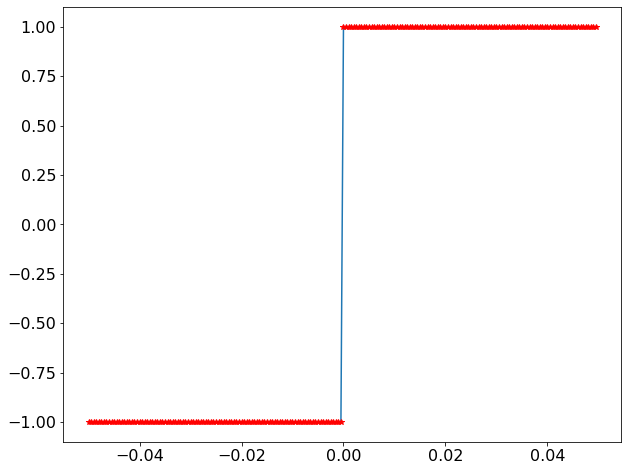

In [28]:
plt.plot(time, Sm)
plt.plot(time, Sm, 'r*')
plt.show()